In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

C:\Users\tasni\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:/Users/tasni/Downloads/reddit.csv")


In [3]:
df

,author,date_time,language,number_of_likes,number_of_shares,Unnamed: 5,Comment,Hateful
0,ArianaGrande,12/1/2017 19:52,en,7900,3472,NaN,Damn I thought they had strict gun laws in Ger...,0
1,ArianaGrande,11/1/2017 8:38,en,3689,1380,NaN,I dont care about what it stands for or anythi...,0
2,ArianaGrande,11/1/2017 2:52,en,10341,2387,NaN,It's not a group it's an idea lol,0
3,ArianaGrande,11/1/2017 2:44,en,10774,2458,NaN,So it's not just America!,0
4,ArianaGrande,10/1/2017 5:22,en,17620,4655,NaN,The dog is a spectacular dancer considering he...,0
...,...,...,...,...,...,...,...,...
995,justinbieber,22/05/2015 01:59,en,10027,4883,NaN,don't believe a word that comes out of the bla...,1
996,justinbieber,21/05/2015 07:23,en,21406,13763,NaN,This is actually big brain,0
997,justinbieber,20/05/2015 05:54,en,32907,13127,NaN,We used to spend time together in the wiggingr...,0
998,justinbieber,14/05/2015 19:07,en,11675,6071,NaN,Anyone else uncomfortable by the name of the p...,0


In [4]:
df.shape

(1000, 8)

In [5]:
label_counts = df['Hateful'].value_counts()

label_counts

0    800
1    200
Name: Hateful, dtype: int64

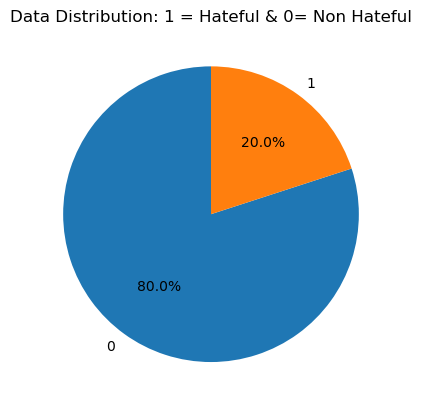

In [6]:
class_distribution = df['Hateful'].value_counts()
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Data Distribution: 1 = Hateful & 0= Non Hateful')
plt.show()

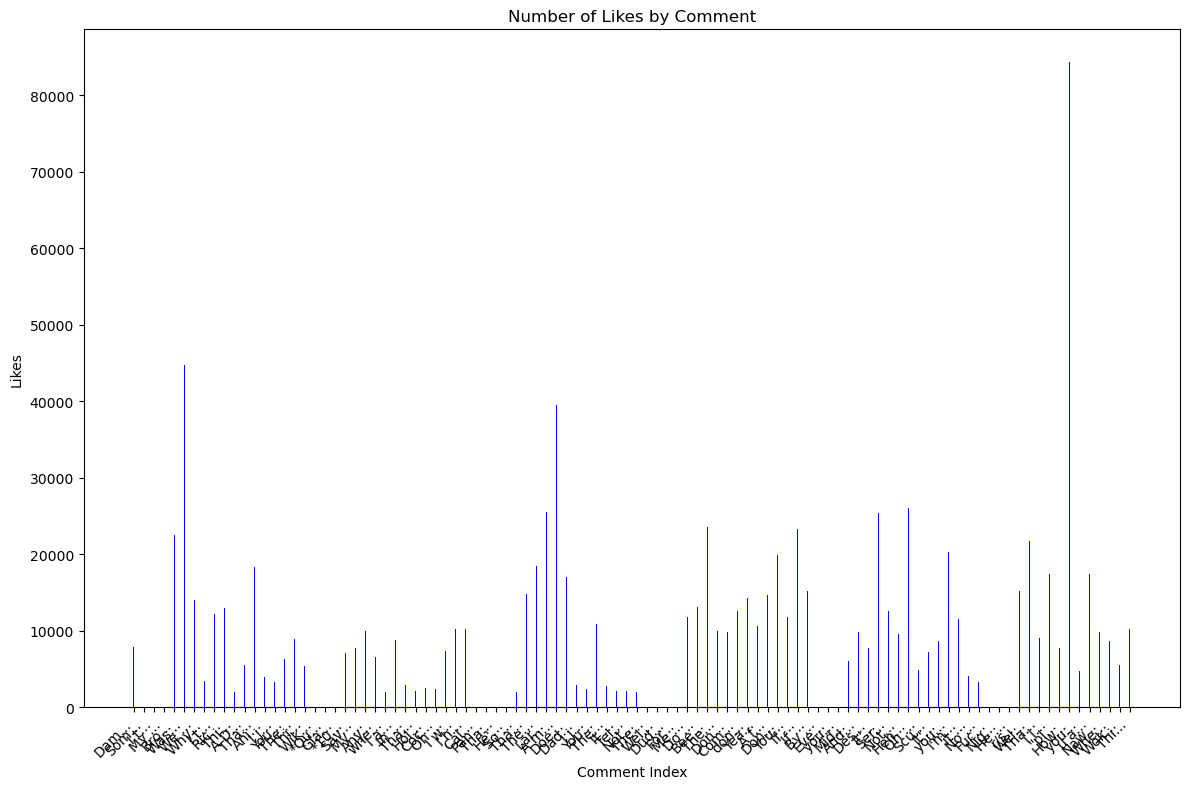

In [7]:
plt.figure(figsize=(12, 8))

# Downsample the data to display every 10th point
downsampled_df = df.iloc[::10]

plt.bar(downsampled_df.index, downsampled_df['number_of_likes'], color='blue')
plt.title('Number of Likes by Comment')
plt.xlabel('Comment Index')
plt.ylabel('Likes')
plt.xticks(downsampled_df.index, downsampled_df['Comment'].str[:3] + '...', rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()

## Data Cleaning

In [8]:
###Handling Missing Values
print ( df.isnull() )

     author  date_time  language  number_of_likes  number_of_shares  \
0     False      False     False            False             False   
1     False      False     False            False             False   
2     False      False     False            False             False   
3     False      False     False            False             False   
4     False      False     False            False             False   
..      ...        ...       ...              ...               ...   
995   False      False     False            False             False   
996   False      False     False            False             False   
997   False      False     False            False             False   
998   False      False     False            False             False   
999   False      False     False            False             False   

     Unnamed: 5  Comment  Hateful  
0          True    False    False  
1          True    False    False  
2          True    False    False  
3  

In [9]:
df. isnull(). sum()

author                 0
date_time              0
language               0
number_of_likes        0
number_of_shares       0
Unnamed: 5          1000
Comment                0
Hateful                0
dtype: int64

In [10]:
df.dropna

<bound method DataFrame.dropna of            author         date_time language  number_of_likes  \
0    ArianaGrande   12/1/2017 19:52       en             7900   
1    ArianaGrande    11/1/2017 8:38       en             3689   
2    ArianaGrande    11/1/2017 2:52       en            10341   
3    ArianaGrande    11/1/2017 2:44       en            10774   
4    ArianaGrande    10/1/2017 5:22       en            17620   
..            ...               ...      ...              ...   
995  justinbieber  22/05/2015 01:59       en            10027   
996  justinbieber  21/05/2015 07:23       en            21406   
997  justinbieber  20/05/2015 05:54       en            32907   
998  justinbieber  14/05/2015 19:07       en            11675   
999  justinbieber  14/05/2015 09:02       en            10799   

     number_of_shares  Unnamed: 5  \
0                3472         NaN   
1                1380         NaN   
2                2387         NaN   
3                2458         NaN   


In [11]:
df.shape

(1000, 8)

In [12]:
##Lowercasing the comments
df['Comment'] = df['Comment'].str.lower()
 
# Removing punctuations
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
df['Comment']= df['Comment'].apply(lambda x: remove_punctuations(x))
df.head()

,author,date_time,language,number_of_likes,number_of_shares,Unnamed: 5,Comment,Hateful
0,ArianaGrande,12/1/2017 19:52,en,7900,3472,NaN,damn i thought they had strict gun laws in ger...,0
1,ArianaGrande,11/1/2017 8:38,en,3689,1380,NaN,i dont care about what it stands for or anythi...,0
2,ArianaGrande,11/1/2017 2:52,en,10341,2387,NaN,its not a group its an idea lol,0
3,ArianaGrande,11/1/2017 2:44,en,10774,2458,NaN,so its not just america,0
4,ArianaGrande,10/1/2017 5:22,en,17620,4655,NaN,the dog is a spectacular dancer considering he...,0


In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources (stopwords and punkt tokenizer)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tasni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#removing stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    imp_words = []
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
 
    # Storing the important words
    for word in word_tokenize(str(text)):
        if word.lower() not in stop_words:
            lemmatized_word = lemmatizer.lemmatize(word)
            imp_words.append(lemmatized_word)
 
    output = " ".join(imp_words)
    return output

# Apply stop words removal to the 'Comment' column
df['Comment'] = df['Comment'].apply(lambda text: remove_stopwords(text))
df.head()

,author,date_time,language,number_of_likes,number_of_shares,Unnamed: 5,Comment,Hateful
0,ArianaGrande,12/1/2017 19:52,en,7900,3472,NaN,damn thought strict gun law germany,0
1,ArianaGrande,11/1/2017 8:38,en,3689,1380,NaN,dont care stand anything connected like shield,0
2,ArianaGrande,11/1/2017 2:52,en,10341,2387,NaN,group idea lol,0
3,ArianaGrande,11/1/2017 2:44,en,10774,2458,NaN,america,0
4,ArianaGrande,10/1/2017 5:22,en,17620,4655,NaN,dog spectacular dancer considering two left foot,0


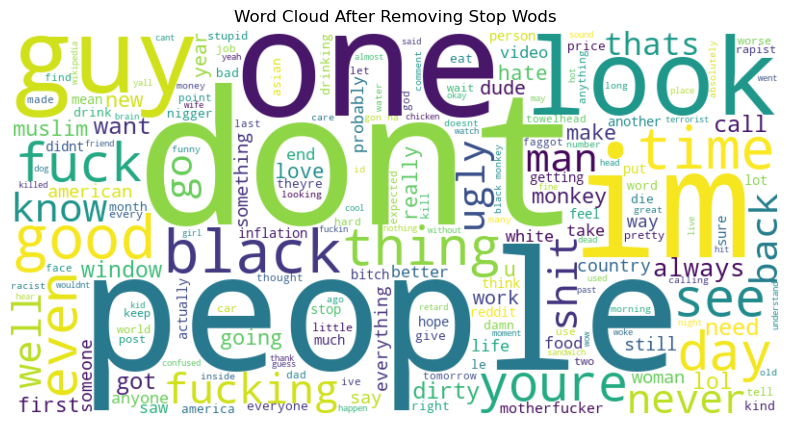

In [17]:
all_comments = ' '.join(df['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Removing Stop Wods')
plt.show()

## Test and Train Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Hateful'], test_size=0.2, random_state=42)


## Feature Engineering

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Removing stop words
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

In [21]:
import seaborn as sns
accuracy_scores = {}
classification_reports = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
classifier_names = []
y_preds = []
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_tfidf)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision_scores[clf_name] = precision_score(y_test, y_pred)
    recall_scores[clf_name] = recall_score(y_test, y_pred)
    f1_scores[clf_name] = f1_score(y_test, y_pred)
    
    # Print results
    print(f'\n{clf_name} Results:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:\n', report)
    
    accuracy_scores[clf_name] = accuracy
    classification_reports[clf_name] = report


Logistic Regression Results:
Accuracy: 0.8750
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       169
           1       1.00      0.19      0.32        31

    accuracy                           0.88       200
   macro avg       0.94      0.60      0.63       200
weighted avg       0.89      0.88      0.84       200


Naive Bayes Results:
Accuracy: 0.8950
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       169
           1       1.00      0.32      0.49        31

    accuracy                           0.90       200
   macro avg       0.94      0.66      0.71       200
weighted avg       0.91      0.90      0.87       200


K-Nearest Neighbors Results:
Accuracy: 0.7950
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.87       169
           1       0.38      0.5

C:\Users\tasni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


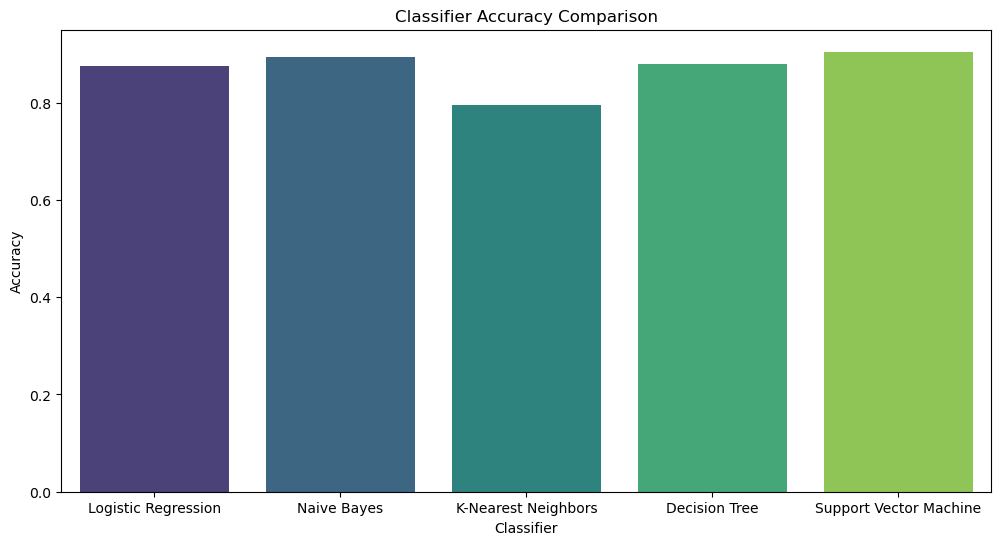

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

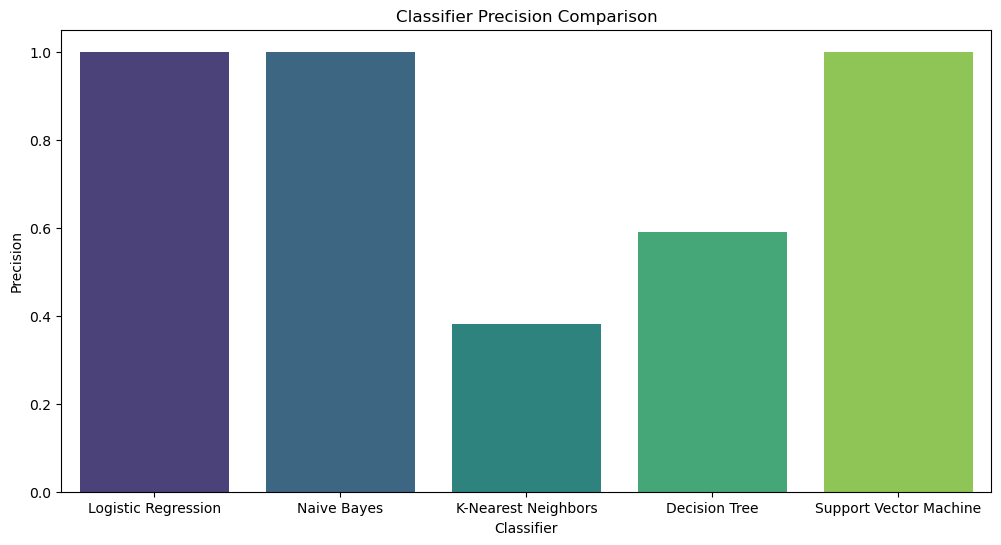

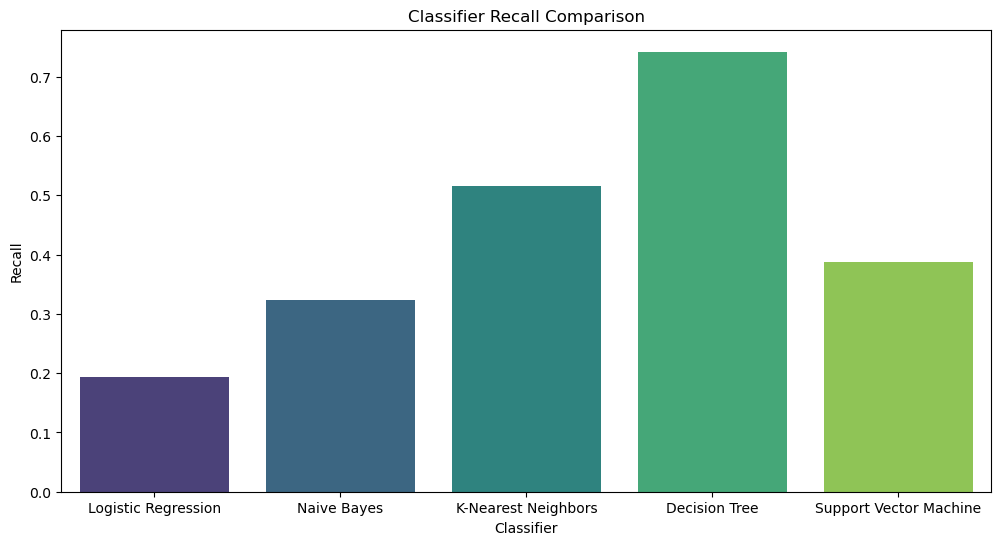

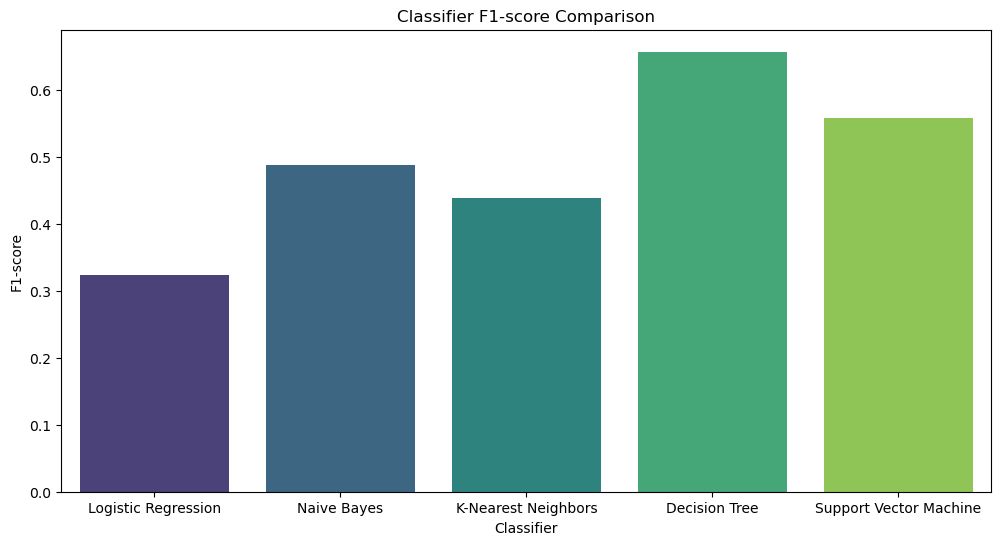

In [23]:
metrics_to_visualize = ['precision', 'recall', 'f1-score']
for metric in metrics_to_visualize:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(classifiers.keys()), y=[precision_scores[name] if metric == 'precision' else
                                               recall_scores[name] if metric == 'recall' else
                                               f1_scores[name] for name in classifiers.keys()], palette='viridis')
    plt.title(f'Classifier {metric.capitalize()} Comparison')
    plt.xlabel('Classifier')
    plt.ylabel(metric.capitalize())
    plt.show()
